<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/Fase_3_Preparaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1rSrsZ04aJ_D3BC67Cy2dBUZ6tmguydNf" alt = "Encabezado MLDS" width = "100%">  </img>

# **Preparación de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. John Robert Gomez Pachón
2. Yojhan Leandro Roldan Robles
3. Daniela Mejia Castro

## **1. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando.

A lo largo de esta entrega, busque responder las siguientes preguntas:

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

A continuación encontrará los puntos a tratar a medida que va realizando la preparación de los datos. En cada punto defina el estado en que se encontraba el dataset, ademas de explicar y justificar las acciones y decisiones que se tomaron.

### **1.1. Valores faltantes**
--- 

Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:

- ¿Cómo afectan estos valores a la integridad y representatividad de la información?

No hay valores faltantes en el conjunto de datos, por lo que la integridad y representatividad de la información no se ven afectadas por la ausencia de valores.

- ¿Cómo se identificaron los valores faltantes en el conjunto de datos?

No se identificaron valores faltantes, ya que no existen en el conjunto de datos.

- ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?

Dado que no hay valores faltantes, no fue necesario tomar decisiones sobre rellenar o eliminar valores faltantes. No se aplicó ningún método de imputación o eliminación.

- ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

No se identificaron valores faltantes en ninguna variable del conjunto de datos. El mapa de calor muestra que todas las celdas están completas, lo que indica que no hay áreas con valores faltantes. Dado que no hay valores faltantes, no se realizó un análisis específico de la distribución de los valores faltantes en relación con variables clave. Por lo tanto, la interpretación de los resultados no se ve afectada por la ausencia de valores faltantes en ninguna variable crítica.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
def diagrama_bigotes_distribucion(df, variable):
  """
  Crea un diagrama de bigotes y la distribución de una variable en un DataFrame.

  Parámetros:
    df: El DataFrame que contiene la variable.
    variable: La variable a analizar.

  Retorno:
    None. Muestra el diagrama de bigotes y la distribución.
  """

  # Crea un subplot con dos filas y una columna.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))

  # Diagrama de bigotes
  sns.boxplot(data=df, x=variable, ax=ax1)
  ax1.set_title(f"Diagrama de bigotes de {variable}")

  # Distribución
  sns.histplot(data=df, x=variable, ax=ax2)
  ax2.set_title(f"Distribución de {variable}")

  # Ajusta el espacio entre las subparcelas
  plt.subplots_adjust(hspace=0.8)

  # Muestra el diagrama
  plt.show()

In [10]:
def plot_distribution(data):
    for column in data.columns:
        plt.figure(figsize=(8, 6))
        data[column].hist()
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

In [24]:
def plot_boxplot_and_distribution(data):
    num_cols = len(data.columns)
    num_rows = num_cols  # Una fila para cada variable

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    fig.tight_layout(pad=5.0)

    sns.set(style="whitegrid")

    for i, column in enumerate(data.columns):
        ax_boxplot = axes[i, 0]
        ax_distribution = axes[i, 1]

        sns.boxplot(x=data[column], ax=ax_boxplot, color='skyblue')
        sns.histplot(data[column], ax=ax_distribution, color='salmon', kde=True)

        ax_boxplot.set_title(f'{column} - Boxplot', fontsize=14, fontweight='bold')
        ax_boxplot.set_xlabel('')
        ax_boxplot.set_ylabel('')

        ax_distribution.set_title(f'{column} - Distribución', fontsize=14, fontweight='bold')
        ax_distribution.set_xlabel('')
        ax_distribution.set_ylabel('')

    plt.show()

In [6]:
#Lectura de los datos en Github
#df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
#Lectura de los datos desde repositorio local
df = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

In [7]:
# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:

# Identificar valores faltantes
missing_values = df.isnull().sum()

# Imprimir la cantidad de valores faltantes por variable
print("Valores faltantes por variable:")
print(missing_values)


Valores faltantes por variable:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


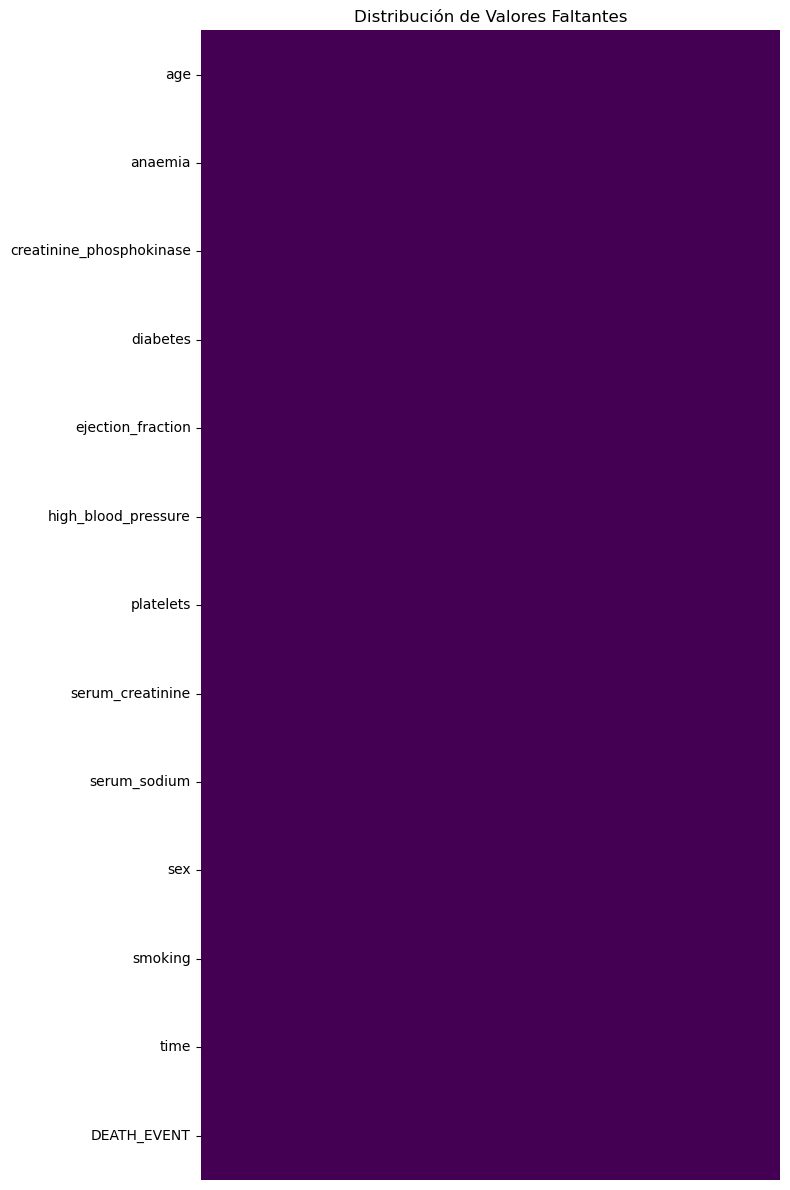

In [10]:
  # Crea la figura y el heatmap
  plt.figure(figsize=(8, 12))  # Cambia el tamaño para la orientación vertical
  sns.heatmap(df.T.isnull(), cmap='viridis', cbar=False, xticklabels=False)

  # Añade el título y rota las etiquetas del eje x para mejor visualización
  plt.title('Distribución de Valores Faltantes')
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Muestra el heatmap
  plt.show()


### **1.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.

In [9]:
# Identificar valores duplicados
duplicates = df[df.duplicated()]

# Imprimir la cantidad de valores duplicados
print("Cantidad de Valores Duplicados:", len(duplicates))


Cantidad de Valores Duplicados: 0


### **1.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.

Primeramente haremos una observación de las distribuciones y un boxplot de cada variable

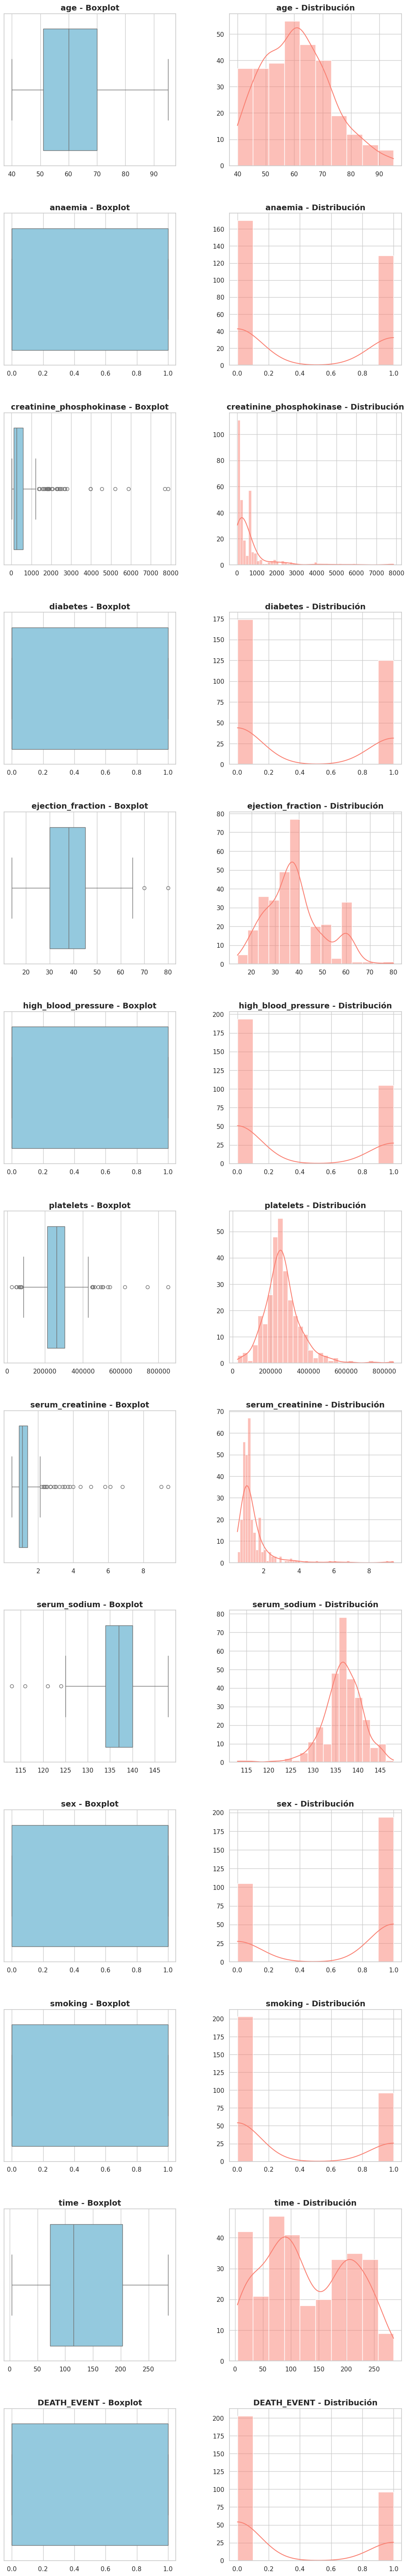

In [22]:
plot_boxplot_and_distribution(df)

Después de una consulta con un cardiólogo especialista en enfermedades cardiovasculares, se llegó a la conclusión de que, en el contexto del fallo cardíaco y con las variables proporcionadas, era esencial conservar los valores atípicos en los datos médicos. La decisión se basó en varias consideraciones clave.

- En primer lugar, se reconoció que el fallo cardíaco es una condición médica compleja y heterogénea, y los datos asociados a menudo son limitados en cantidad debido a la naturaleza específica de la recopilación de datos en entornos clínicos. Dado el tamaño potencialmente reducido del conjunto de datos, cada observación, incluidos los valores atípicos, podría contener información valiosa para comprender la variabilidad de los factores de riesgo y las características clínicas asociadas con el fallo cardíaco.

- En segundo lugar, se determinó que los valores atípicos podrían proporcionar información crucial sobre la distribución de probabilidad de las variables médicas relevantes para el fallo cardíaco. Por ejemplo, los valores atípicos en biomarcadores como la creatinina sérica o el sodio sérico podrían indicar la presencia de insuficiencia renal o desequilibrios electrolíticos, factores importantes que pueden influir en el pronóstico y el tratamiento de los pacientes con fallo cardíaco.

- Además, se consideró la relevancia clínica de los valores atípicos en el contexto del fallo cardíaco. Por ejemplo, los valores atípicos en la fracción de eyección del ventrículo izquierdo (ejection_fraction) podrían indicar la presencia de disfunción ventricular grave, lo que podría requerir una intervención médica inmediata, como la optimización de la terapia farmacológica o la evaluación para la cirugía de revascularización coronaria.

### **1.4. Datos Inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?
* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?
* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?
* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?
* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?

---**INGRESE SU RESPUESTA**---

In [ ]:
# Identificar inconsistencias en las unidades o formatos
inconsistencias = df[(df['platelets'] < 100000) | (df['serum_creatinine'] > 10)]


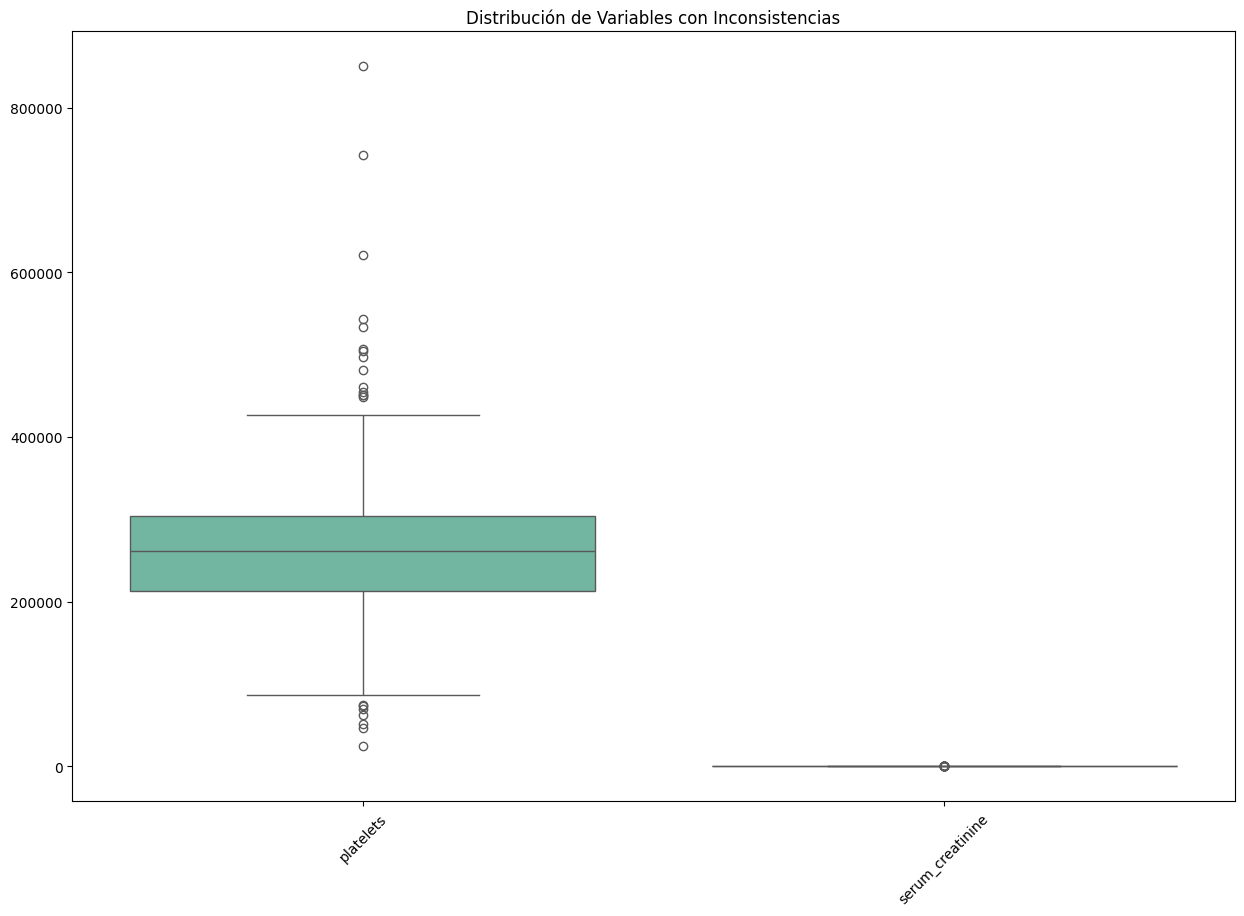

In [ ]:
# Visualizar las distribuciones de variables con inconsistencias
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['platelets', 'serum_creatinine']], palette='Set2')
plt.title('Distribución de Variables con Inconsistencias')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mostrar la cantidad de registros con inconsistencias
print("Cantidad de Registros con Inconsistencias:", len(inconsistencias))

Cantidad de Registros con Inconsistencias: 8


In [ ]:
# Identificar y manejar inconsistencias (puedes elegir estandarizar unidades, imputar valores, etc.)
# En este ejemplo, se imputarán valores para 'platelets' y 'serum_creatinine' fuera de rangos razonables
df_cleaned = df.copy()
df_cleaned.loc[df_cleaned['platelets'] < 100000, 'platelets'] = df_cleaned['platelets'].median()
df_cleaned.loc[df_cleaned['serum_creatinine'] > 10, 'serum_creatinine'] = df_cleaned['serum_creatinine'].median()

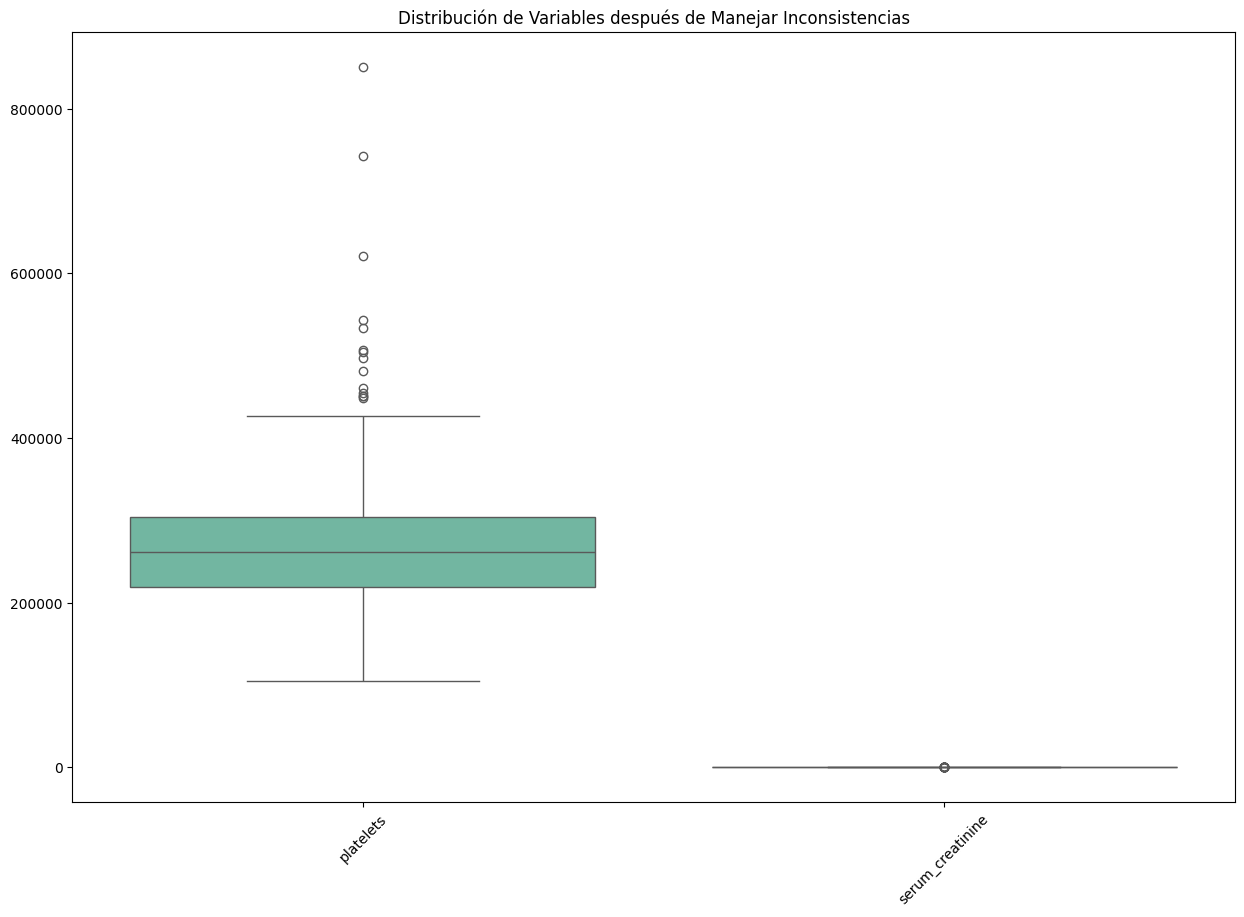

In [ ]:
# Visualizar las distribuciones de variables después de manejar inconsistencias
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned[['platelets', 'serum_creatinine']], palette='Set2')
plt.title('Distribución de Variables después de Manejar Inconsistencias')
plt.xticks(rotation=45)
plt.show()


### **1.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

---**INGRESE SU RESPUESTA**---

In [26]:
# Identificar datos corruptos (ejemplo: valores negativos en variables que no pueden ser negativas)
datos_corruptos = df[(df['platelets'] < 0) | (df['serum_creatinine'] < 0)]

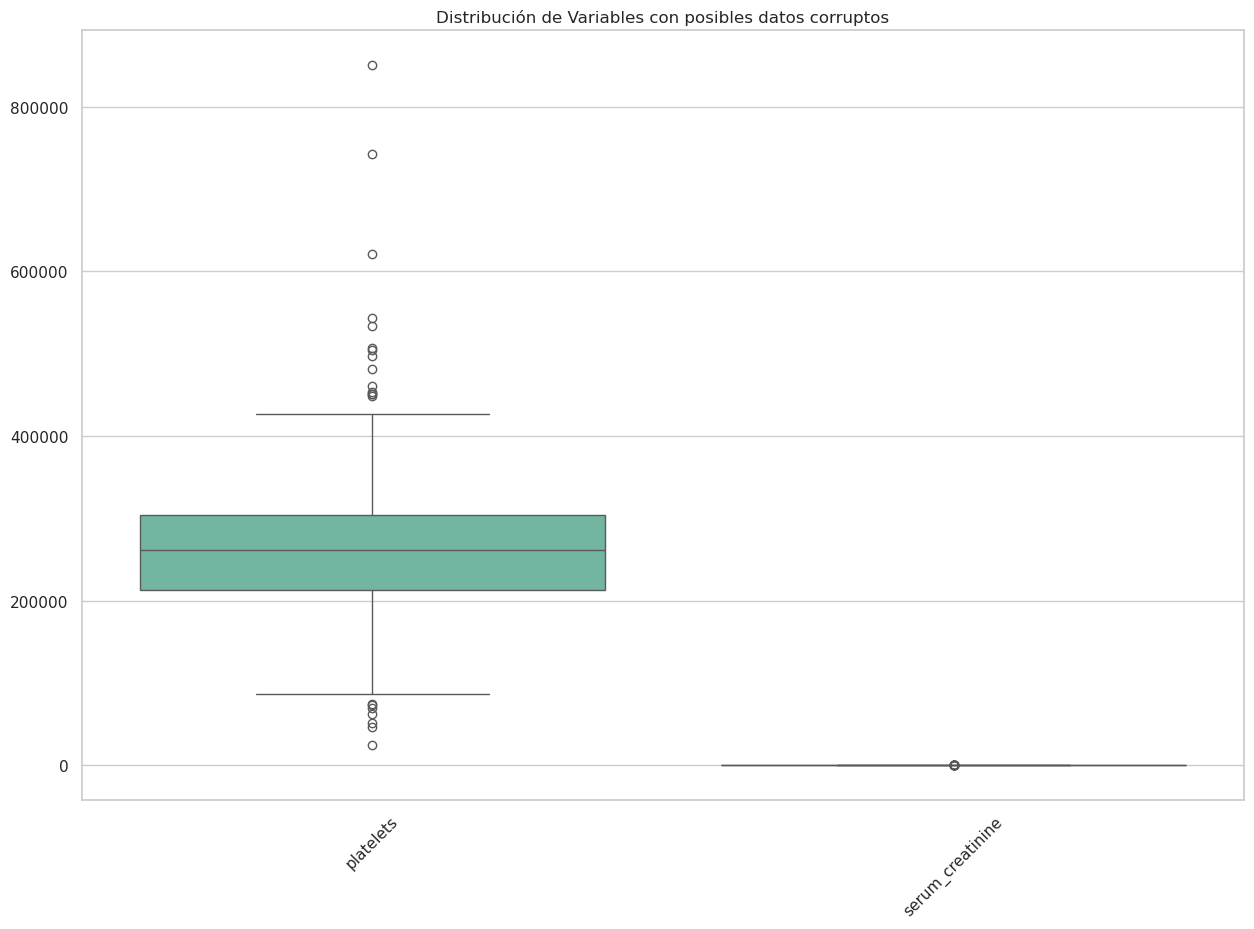

In [29]:
# Visualizar las distribuciones de variables con datos corruptos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['platelets', 'serum_creatinine']], palette='Set2')
plt.title('Distribución de Variables con posibles datos corruptos')
plt.xticks(rotation=45)
plt.show()



In [30]:
# Mostrar la cantidad de registros con datos corruptos
print("Cantidad de Registros con Datos Corruptos:", len(datos_corruptos))


Cantidad de Registros con Datos Corruptos: 0


### **1.6. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?



La selección se hizo basada en los datos ofrecidos en el [Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) Esto nos asegura criterios sobre la integridad de los datos y al ser una cantidad tan escasa de datos y al muestrearse de forma cuidadosa su muestreo se dió paciente a paciente. Los criterios de inclusión o exclusión de variables en el dataset fue una decisión médica

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*